## Simple Neural Network for XOR

**For XOR:**

*   **Input:** (0, 0) $\rightarrow$ **Output:** 0
*   **Input:** (0, 1) $\rightarrow$ **Output:** 1
*   **Input:** (1, 0) $\rightarrow$ **Output:** 1
*   **Input:** (1, 1) $\rightarrow$ **Output:** 0

In [29]:
import numpy as np

# Data for XOR
X_raw = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])      # shape (4,2)

y_raw = np.array([[0], [1], [1], [0]])  # shape (4,1)

X = X_raw.T       # (2,4)
Y = y_raw.T       # (1,4)

## Activation Function

In [30]:
# Sigmoid activation and its derivative
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_deriv(A):
    return A * (1 - A) 

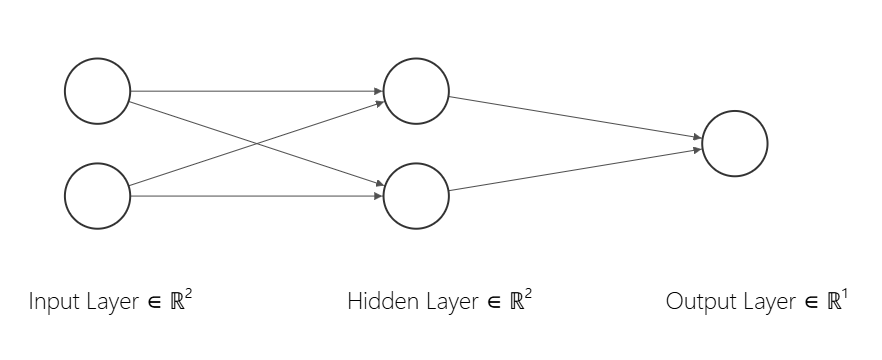



We will build a simple fully-connected neural network to learn the XOR function. We have m=4 training examples.

- **Input layer** $a^{[0]}$: 2 units (the two XOR inputs)  
- **Hidden layer** $a^{[1]}$: 2 units, sigmoid activation  
- **Output layer** $a^{[2]}$: 1 unit, sigmoid activation (binary output)

---

## Forward Propagation

$$
Z^{[1]} = W^{[1]} X + b^{[1]}
$$

$$
A^{[1]} = \sigma(Z^{[1]})
$$

$$
Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}
$$

$$
A^{[2]} = \sigma(Z^{[2]})
$$

---

### Variable Shapes for Forward Pass

- $A^{[0]} = X \in \mathbb{R}^{2 \times m}$
- $Z^{[1]}, A^{[1]} \in \mathbb{R}^{2 \times m}$
- $W^{[1]} \in \mathbb{R}^{2 \times 2}$
- $b^{[1]} \in \mathbb{R}^{2 \times 1}$
- $Z^{[2]}, A^{[2]} \in \mathbb{R}^{1 \times m}$
- $W^{[2]} \in \mathbb{R}^{1 \times 2}$
- $b^{[2]} \in \mathbb{R}^{1 \times 1}$


In [31]:
# Parameters Initialization
def init_params(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.1
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.1
    b2 = np.zeros((n_y, 1))
    return W1, b1, W2, b2


# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

## Backward Propagation

$$
dZ^{[2]} = A^{[2]} - Y
$$

$$
dW^{[2]} = \frac{1}{m} \, dZ^{[2]} A^{[1]T}
$$

$$
db^{[2]} = \frac{1}{m} \sum dZ^{[2]}
$$

$$
dZ^{[1]} = W^{[2]T} dZ^{[2]} \circ \sigma'(A^{[1]})
$$

$$
dW^{[1]} = \frac{1}{m} \, dZ^{[1]} A^{[0]T}
$$

$$
db^{[1]} = \frac{1}{m} \sum dZ^{[1]}
$$

---
### Variable Shapes for Backward Pass

- $dZ^{[2]} \in \mathbb{R}^{1 \times m}$
- $dW^{[2]} \in \mathbb{R}^{1 \times 2}$
- $db^{[2]} \in \mathbb{R}^{1 \times 1}$
- $dZ^{[1]} \in \mathbb{R}^{2 \times m}$
- $dW^{[1]} \in \mathbb{R}^{2 \times 2}$
- $db^{[1]} \in \mathbb{R}^{2 \times 1}$


In [32]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * sigmoid_deriv(A1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

## Parameter Updates

$$
W^{[2]} := W^{[2]} - \alpha \, dW^{[2]}
$$

$$
b^{[2]} := b^{[2]} - \alpha \, db^{[2]}
$$

$$
W^{[1]} := W^{[1]} - \alpha \, dW^{[1]}
$$

$$
b^{[1]} := b^{[1]} - \alpha \, db^{[1]}
$$

---

In [33]:
# Update weights
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


# Prediction
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return (A2 > 0.5).astype(int)

In [34]:
# Training loop 
def gradient_descent(X, Y, iterations=10000, alpha=1.0):
    n_x = X.shape[0]
    n_h = 2
    n_y = 1

    W1, b1, W2, b2 = init_params(n_x, n_h, n_y)

    for i in range(iterations + 1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 2000 == 0:
            predictions = predict(X, W1, b1, W2, b2)
            acc = np.mean(predictions == Y)
            print(f"Iteration {i}   Accuracy: {acc*100:.2f}%")

    return W1, b1, W2, b2


# Train
W1, b1, W2, b2 = gradient_descent(X, Y)

Iteration 0   Accuracy: 50.00%
Iteration 2000   Accuracy: 50.00%
Iteration 4000   Accuracy: 100.00%
Iteration 6000   Accuracy: 100.00%
Iteration 8000   Accuracy: 100.00%
Iteration 10000   Accuracy: 100.00%


In [35]:
# Prediction
preds = predict(X, W1, b1, W2, b2)
print("\nPredictions:", preds.flatten())
print("True Labels:", Y.flatten())
print("Final Accuracy:", np.mean(preds == Y))


Predictions: [0 1 1 0]
True Labels: [0 1 1 0]
Final Accuracy: 1.0




## Backpropagation Derivation

### 1. Activation function

**Hidden Layer**
$$ g^{[1]}(z) = \sigma(z) = \frac{1}{1+e^{-z}} $$

**Output Layer**
$$ g^{[2]}(z) = \sigma(z) = \frac{1}{1+e^{-z}} $$

**Sigmoid Derivative**
$$ \sigma'(z) = \sigma(z)(1-\sigma(z)) $$

### 2. Loss Function: Binary Cross-Entropy

Since the output activation is sigmoid, we use:

$$ L(a,y) = - \left[ y \ln(a) + (1-y) \ln(1-a) \right] $$

Where $a = A^{[2]}$ and $y = Y$.

---

### 3.1 Derivation 1: Output Layer Error $dZ^{[2]}$

We want to find:
$$ \frac{\partial L}{\partial Z^{[2]}} = \frac{\partial L}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} $$

#### Step A: Compute $\frac{\partial L}{\partial A^{[2]}}$

$$ \frac{\partial L}{\partial A^{[2]}} = -\frac{y}{A^{[2]}} + \frac{1-y}{1-A^{[2]}} $$

Combine terms over a common denominator:
$$ \frac{\partial L}{\partial A^{[2]}} = \frac{-y(1-A^{[2]}) + (1-y)A^{[2]}}{A^{[2]}(1-A^{[2]})} $$
$$ \frac{\partial L}{\partial A^{[2]}} = \frac{A^{[2]} - y}{A^{[2]}(1-A^{[2]})} $$

#### Step B: Derivative of Sigmoid
$$ \frac{\partial A^{[2]}}{\partial Z^{[2]}} = A^{[2]}(1-A^{[2]}) $$

#### Step C: Multiply
$$ dZ^{[2]} = \left( \frac{A^{[2]} - y}{A^{[2]}(1-A^{[2]})} \right) \cdot \left( A^{[2]}(1-A^{[2]}) \right) $$

The denominator cancels out and leads to:
$$ dZ^{[2]} = A^{[2]} - Y $$

---

### 3.2 Derivation 2: Hidden Layer Error $dZ^{[1]}$

Backward application of the chain rule:
$$ dZ^{[1]} = \frac{\partial L}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial A^{[1]}} \cdot \frac{\partial A^{[1]}}{\partial Z^{[1]}} $$

#### Step A: Backprop through weights $W^{[2]}$

Given:
$$ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} $$

Thus:
$$ \frac{\partial Z^{[2]}}{\partial A^{[1]}} = W^{[2]} $$

The backpropagated error is:
$$ W^{[2]T} dZ^{[2]} $$

#### Step B: Hidden-layer sigmoid derivative
$$ A^{[1]} = \sigma(Z^{[1]}) $$
$$ \frac{\partial A^{[1]}}{\partial Z^{[1]}} = A^{[1]}(1 - A^{[1]}) $$

#### Step C: Element-wise Combine
We combine the backpropagated error with the derivative of the activation function using element-wise multiplication ($\odot$):

$$ dZ^{[1]} = (W^{[2]T} dZ^{[2]}) \odot (A^{[1]}(1 - A^{[1]})) $$

### 4. Bias Gradients

The bias gradients are computed by averaging the errors ($dZ$) across all $m$ training examples. This is equivalent to summing the rows of the $dZ$ matrix and dividing by $m$:

$$ db^{[2]} = \frac{1}{m} \sum_{j=1}^{m} dZ^{[2](j)} $$

$$ db^{[1]} = \frac{1}{m} \sum_{j=1}^{m} dZ^{[1](j)} $$

## General Parameter Shapes for a Neural Network

Consider an $L$-layer fully connected (dense) neural network:

*   **Layer 0**: Input layer
*   **Layer $1, 2, \dots, L-1$**: Hidden layers
*   **Layer $L$**: Output layer

**Definitions:**
*   $n^{[l]}$: Number of units (neurons) in layer $l$
*   $m$: Number of training examples
*   $X$: Input data of shape $(n^{[0]}, m)$

---

### 1. Parameter Shapes

For each layer $l$:

**Weights**
$$ W^{[l]} \in \mathbb{R}^{n^{[l]} \times n^{[l-1]}} $$

**Biases**
$$ b^{[l]} \in \mathbb{R}^{n^{[l]} \times 1} $$

---

### 2. Forward Pass Shapes

**Linear pre-activation**
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$
*   **Shape:** $Z^{[l]} \in \mathbb{R}^{n^{[l]} \times m}$

**Activation**
$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$
*   **Shape:** $A^{[l]} \in \mathbb{R}^{n^{[l]} \times m}$
*   *Note: $A^{[0]} = X$*

---

### 3. Backward Pass (Backprop Shapes)

**Output layer gradient**
$$ dZ^{[L]} = A^{[L]} - Y $$
*   **Shape:** $dZ^{[L]} \in \mathbb{R}^{n^{[L]} \times m}$

**General backprop rule (for any layer $l$)**

1.  **Pre-activation gradient:**
    $$ dZ^{[l]} \in \mathbb{R}^{n^{[l]} \times m} $$

2.  **Weight gradient:**
    $$ dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]T} $$
    *   **Shape:** $dW^{[l]} \in \mathbb{R}^{n^{[l]} \times n^{[l-1]}}$

3.  **Bias gradient:**
    $$ db^{[l]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[l](i)} $$
    *   **Shape:** $db^{[l]} \in \mathbb{R}^{n^{[l]} \times 1}$

4.  **Gradient flowing to previous layer:**
    $$ dA^{[l-1]} = W^{[l]T} dZ^{[l]} $$
    *   **Shape:** $dA^{[l-1]} \in \mathbb{R}^{n^{[l-1]} \times m}$

---

### 4. Shape Summary Table

| Quantity | Shape | Notes |
| :--- | :--- | :--- |
| $W^{[l]}$ | $(n^{[l]}, n^{[l-1]})$ | Weights |
| $b^{[l]}$ | $(n^{[l]}, 1)$ | Biases |
| $Z^{[l]}$ | $(n^{[l]}, m)$ | Linear output |
| $A^{[l]}$ | $(n^{[l]}, m)$ | Activation |
| $dZ^{[l]}$ | $(n^{[l]}, m)$ | Backprop error |
| $dW^{[l]}$ | $(n^{[l]}, n^{[l-1]})$ | Gradient w.r.t weights |
| $db^{[l]}$ | $(n^{[l]}, 1)$ | Gradient w.r.t biases |
| $dA^{[l-1]}$ | $(n^{[l-1]}, m)$ | Gradient to previous layer |